<a href="https://colab.research.google.com/github/slisovych/machine_learning_hometasks/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
cars_df = pd.read_csv('drive/MyDrive/Colab Notebooks/ML_Hanna_Pylieva/data/cars.csv')
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [5]:
cars_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [6]:
categorical_cols = cars_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = cars_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nКатегоріальні колонки:", categorical_cols)
print("Числові колонки:", numerical_cols)


Категоріальні колонки: ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']
Числові колонки: ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']


In [7]:
for col in categorical_cols:
    unique_values = cars_df[col].unique()
    print(f"\nКолонка: {col}")
    print(f"Унікальні значення: {unique_values}")
    print(f"Кількість унікальних значень: {cars_df[col].nunique()}")


Колонка: Brand
Унікальні значення: ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Кількість унікальних значень: 11

Колонка: Model
Унікальні значення: ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
Кількість унікальних значень: 58

Колонка: Fuel_Type
Унікальні значення: ['Petrol' 'Diesel']
Кількість унікальних значень: 2

Колонка: Transmission
Унікальні значення: ['Manual' 'Automatic']
Кількість унікальних значень: 2

Колонка: Owner_Type
Унікальні значення: ['First' 'Second' 'Third']
Кількість унікал

In [8]:
print(f"Кількість числових колонок: {len(numerical_cols)}")
print(f"Кількість категоріальних колонок: {len(categorical_cols)}")

Кількість числових колонок: 8
Кількість категоріальних колонок: 5


**Висновок:**

У наборі даних є:

6 числових колонок (цілочислові: `Year`, `Kilometers_Driven`, `Mileage`, `Engine`, `Power`, `Seats`, `Price`).

5 категоріальних колонок:

Бінарні: 2: `Fuel_Type`, `Transmission`.

Мультикатегоріальні без порядку: 2: `Brand`, `Model`.

Мультикатегоріальні з порядком: 1: `Owner_Type`.

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [9]:
X = cars_df.drop(columns=['Price'])  # Всі колонки, крім Price
y = cars_df['Price']  # Цільова змінна

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80, 12)
X_test shape: (20, 12)
y_train shape: (80,)
y_test shape: (20,)


**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

<Axes: xlabel='Fuel_Type', ylabel='Price'>

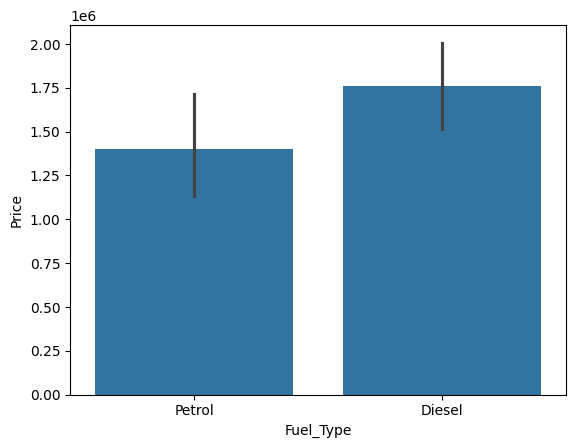

In [10]:
sns.barplot(data=cars_df, x='Fuel_Type', y='Price')

In [11]:
fuel_type_mapping = {'Petrol': 0, 'Diesel': 1}

X_train['Fuel_Type_codes'] = X_train['Fuel_Type'].map(fuel_type_mapping)
X_test['Fuel_Type_codes'] = X_test['Fuel_Type'].map(fuel_type_mapping)

<Axes: xlabel='Transmission', ylabel='Price'>

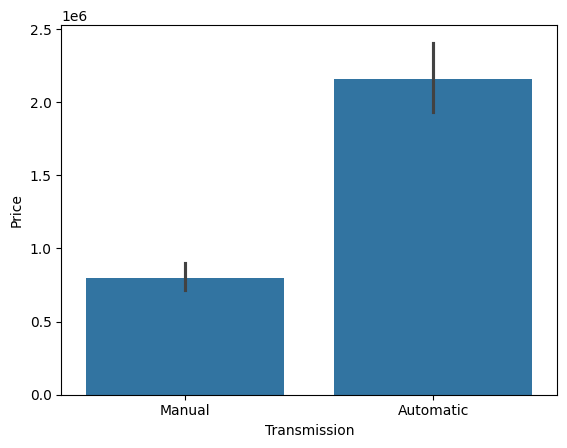

In [12]:
sns.barplot(data=cars_df, x='Transmission', y='Price')

In [13]:
Transmission_mapping = {'Manual': 0, 'Automatic': 1}

X_train['Transmission_codes'] = X_train['Transmission'].map(Transmission_mapping)
X_test['Transmission_codes'] = X_test['Transmission'].map(Transmission_mapping)

In [14]:
from sklearn import preprocessing
import pandas as pd

enc = preprocessing.OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[['Brand']])

one_hot_train = enc.transform(X_train['Brand'].values.reshape(-1, 1))
X_train[enc.categories_[0]] = one_hot_train.toarray()

one_hot_test = enc.transform(X_test['Brand'].values.reshape(-1, 1))
X_test[enc.categories_[0]] = one_hot_test.toarray()

print("X_train після кодування:")
print(X_train.head())

print("\nX_test після кодування:")
print(X_test.head())


X_train після кодування:
    Car_ID       Brand  Model  Year  Kilometers_Driven Fuel_Type Transmission  \
83      84  Volkswagen  T-Roc  2019              22000    Petrol    Automatic   
55      56        Audi     A5  2018              28000    Diesel    Automatic   
26      27        Audi     A6  2018              28000    Petrol    Automatic   
54      55  Volkswagen  Vento  2017              32000    Petrol       Manual   
19      20    Mercedes    GLC  2017              26000    Petrol    Automatic   

   Owner_Type  Mileage  Engine  ...  BMW  Ford  Honda  Hyundai  Mahindra  \
83     Second       18    1498  ...  0.0   0.0    0.0      0.0       0.0   
55      First       17    1968  ...  0.0   0.0    0.0      0.0       0.0   
26      First       15    1984  ...  0.0   0.0    0.0      0.0       0.0   
54     Second       18    1598  ...  0.0   0.0    0.0      0.0       0.0   
19     Second       12    1991  ...  0.0   0.0    0.0      0.0       0.0   

    Maruti  Mercedes  Tata  Toy

In [15]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])



Очікуваний результат після трансформацій:

In [16]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [17]:
# Вибір числових колонок із тренувального набору
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

# Додаємо цільову змінну
X_train_numeric = pd.concat([X_train_numeric, y_train.reset_index(drop=True)], axis=1)
X_train_numeric = X_train_numeric.drop(columns=['Car_ID'])


In [18]:
X_train.isnull().sum()

,0
Car_ID,0
Brand,0
Model,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,0
Engine,0


In [19]:
X_train_numeric.corr().sort_values(by='Price', ascending=False)

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_codes,Transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Price,-0.057246,0.121312,-0.061016,0.041865,-0.091369,0.181523,-0.052750,-0.162914,0.086245,-0.157757,0.182092,0.117881,0.154146,0.252620,-0.232518,-0.224148,-0.004196,-0.137453,0.053903,0.130539,1.000000
Mahindra,0.181669,-0.040344,0.029427,-0.024973,-0.118021,0.007738,0.235225,-0.170703,-0.076472,-0.081680,-0.081680,-0.059235,-0.065326,1.000000,-0.059235,-0.081680,-0.086711,-0.076472,-0.071041,0.035088,0.252620
Ford,-0.150454,-0.009761,-0.296480,0.184231,0.240501,-0.161451,-0.109812,-0.122816,-0.118678,-0.126761,1.000000,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.190586,0.182092
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.181523
Hyundai,-0.092099,0.154362,0.217406,-0.182213,-0.170966,-0.086439,0.007121,0.031659,-0.094916,-0.101380,-0.101380,-0.073521,1.000000,-0.065326,-0.073521,-0.101380,-0.107624,-0.094916,-0.088175,0.297594,0.154146
Owner_Type_Codes,-0.014499,-0.001772,0.026624,-0.196106,-0.204309,-0.043849,-0.281122,0.005886,-0.203925,0.009076,0.190586,-0.177705,0.297594,0.035088,0.217195,-0.172435,-0.375748,-0.012745,0.301080,1.000000,0.130539
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,0.121312
Honda,-0.037437,0.057372,0.358630,-0.154491,-0.191810,0.200303,0.161425,-0.218620,-0.086066,-0.091928,-0.091928,1.000000,-0.073521,-0.059235,-0.066667,-0.091928,-0.097590,-0.086066,-0.079954,-0.177705,0.117881
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.086245
Volkswagen,0.018255,-0.137675,0.085114,-0.165115,-0.148437,-0.094002,-0.125010,0.155500,-0.103221,-0.110250,-0.110250,-0.079954,-0.088175,-0.071041,-0.079954,-0.110250,-0.117041,-0.103221,1.000000,0.301080,0.053903


<Axes: >

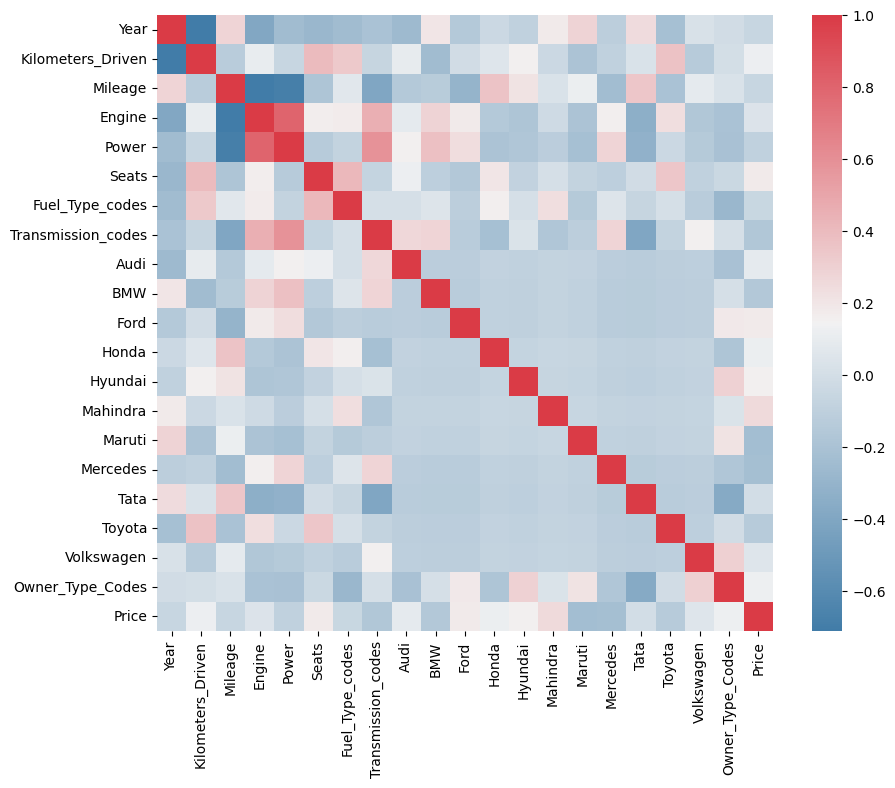

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
corr = X_train_numeric.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

In [21]:
X_train_numeric.corr()['Price'].sort_values(ascending = False)

,Price
Price,1.000000
Mahindra,0.252620
Ford,0.182092
Seats,0.181523
Hyundai,0.154146
Owner_Type_Codes,0.130539
Kilometers_Driven,0.121312
Honda,0.117881
Audi,0.086245
Volkswagen,0.053903


In [22]:
correlation_matrix = X_train_numeric.corr()

high_correlation = correlation_matrix['Price'][correlation_matrix['Price'].abs() > 0.5]

print("\nКолонки з кореляцією більше ніж 0.5 за модулем:")
print(high_correlation)


Колонки з кореляцією більше ніж 0.5 за модулем:
Price    1.0
Name: Price, dtype: float64


**Спостереження**

1. Сильна кореляція між `Engine` та `Power` (~0.80):
Це логічно, оскільки потужність двигуна прямо залежить від об’єму двигуна.

2. Негативна кореляція між `Mileage` та `Engine` (~-0.71):
Чим більший об'єм двигуна, тим менший пробіг автомобіля на одиницю пального.

3. Відсутність сильної кореляції з цільовою змінною `Price`:

Жодна із змінних не має кореляції з `Price` більше ніж 0.5 за модулем.
Найбільший вплив мають такі змінні:

Найвищу позитивну кореляцію з ціною мають:

`Brand_Mahindra` (0.25)

`Brand_Ford` (0.18)

`Seats` (0.18)

Найвищу негативну кореляцію з ціною мають:

`Brand_Maruti` (-0.23)

`Brand_Mercedes` (-0.22)

`Transmission_codes` (-0.16)

Це свідчить про те, що бренд автомобіля та тип трансмісії є більш важливими факторами, ніж технічні характеристики, такі як `Engine` або `Power`.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [23]:
X_train = X_train.select_dtypes(include=['int64', 'float64'])
X_test = X_test.select_dtypes(include=['int64', 'float64'])

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))

print(f"Loss train: {rmse_train}")
print(f"Loss test: {rmse_test}")

Loss train: 210293.57828151862
Loss test: 258181.561120329


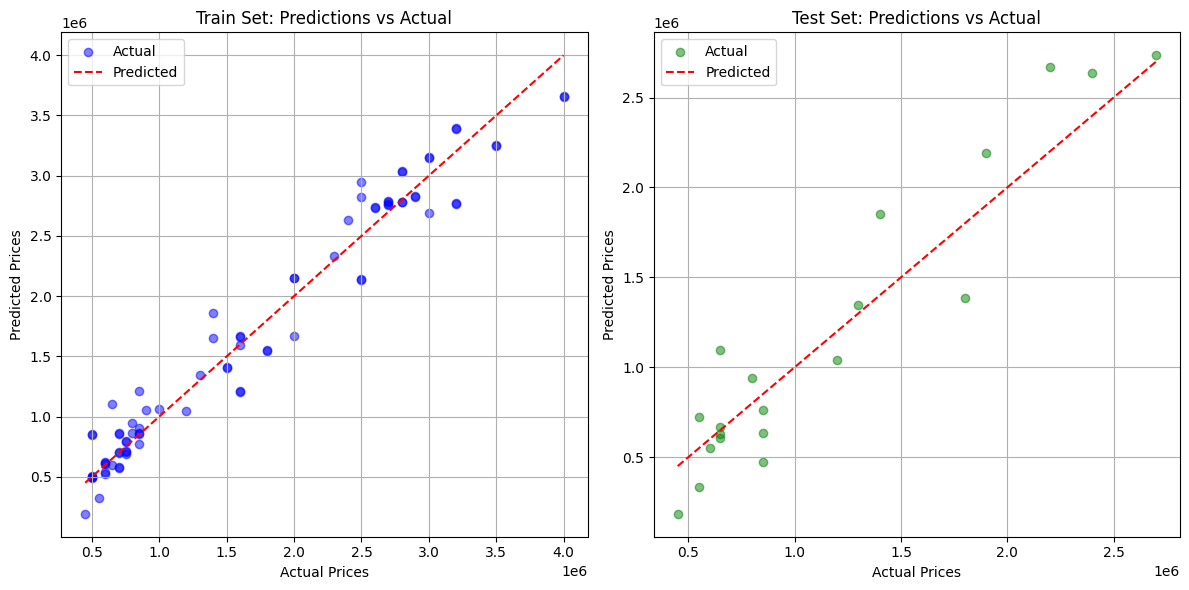

In [25]:
def plot_predictions_vs_actual(y_train, predictions_train, y_test, predictions_test):
    plt.figure(figsize=(12, 6))

    # Графік для тренувального набору
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, predictions_train, alpha=0.5, color='blue')
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Train Set: Predictions vs Actual')
    plt.legend(['Actual', 'Predicted'])
    plt.grid(True)

    # Графік для тестового набору
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, predictions_test, alpha=0.5, color='green')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title('Test Set: Predictions vs Actual')
    plt.legend(['Actual', 'Predicted'])
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_predictions_vs_actual(y_train, predictions_train, y_test, predictions_test)

**Спостереження**

На лівому графіку видно, що більшість передбачень моделі для тренувального набору добре збігаються з реальною ціною автомобіля.
Точки передбачень розташовані близько до червоної діагональної лінії, яка відображає передбачення.

Спостереження для тестового набору:
На правому графіку видно, що передбачення для тестового набору менш точні.
Багато точок відхиляються від червоної лінії, особливо для вищих значень.
Це може свідчити про перенавчання моделі. Можливо, потрібно зменшити кількість ознак, чи застосувати нормалізацію.


**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [26]:
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
categorical_cols = [
    'Fuel_Type_codes', 'Transmission_codes', 'Audi', 'BMW', 'Ford', 'Honda', 'Hyundai',
    'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota', 'Volkswagen', 'Owner_Type_Codes'
]

In [27]:
# Масштабування числових колонок
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numerical_cols]),
    columns=numerical_cols
)

# Об'єднання числових і категоріальних колонок
X_train_final = pd.concat([X_train_scaled, X_train[categorical_cols].reset_index(drop=True)], axis=1)

# Перевірка результату
print(X_train_final.head())

       Year  Kilometers_Driven   Mileage    Engine     Power     Seats  \
0  0.568813          -0.693871  0.274862 -0.628491 -0.231967 -0.303562   
1 -0.323442          -0.039533 -0.018324  0.087196  0.247012 -0.303562   
2 -0.323442          -0.039533 -0.604696  0.111560  0.910213 -0.303562   
3 -1.215697           0.396692  0.274862 -0.476217 -0.784634 -0.303562   
4 -1.215697          -0.257646 -1.484254  0.122219  0.910213 -0.303562   

   Fuel_Type_codes  Transmission_codes  Audi  BMW  Ford  Honda  Hyundai  \
0                0                   1   0.0  0.0   0.0    0.0      0.0   
1                1                   1   1.0  0.0   0.0    0.0      0.0   
2                0                   1   1.0  0.0   0.0    0.0      0.0   
3                0                   0   0.0  0.0   0.0    0.0      0.0   
4                0                   1   0.0  0.0   0.0    0.0      0.0   

   Mahindra  Maruti  Mercedes  Tata  Toyota  Volkswagen  Owner_Type_Codes  
0       0.0     0.0       0.

In [28]:
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numerical_cols]),
    columns=numerical_cols
)
X_test_final = pd.concat([X_test_scaled, X_test[categorical_cols].reset_index(drop=True)], axis=1)
print(X_test_final.head())

       Year  Kilometers_Driven   Mileage    Engine     Power     Seats  \
0 -2.107952           1.051030 -0.604696 -0.785333 -0.231967 -0.303562   
1  0.568813          -0.257646  0.861234 -1.255859 -1.214487 -0.303562   
2 -1.215697           0.396692  0.274862 -0.476217 -0.784634 -0.303562   
3  1.461068          -1.130096  0.568048 -0.683310 -0.784634  2.394771   
4  0.568813          -0.257646  0.861234 -1.091404 -0.895168 -0.303562   

   Fuel_Type_codes  Transmission_codes  Audi  BMW  Ford  Honda  Hyundai  \
0                0                   1   1.0  0.0   0.0    0.0      0.0   
1                0                   0   0.0  0.0   0.0    0.0      1.0   
2                0                   0   0.0  0.0   0.0    0.0      0.0   
3                0                   0   0.0  0.0   0.0    0.0      0.0   
4                0                   0   0.0  0.0   1.0    0.0      0.0   

   Mahindra  Maruti  Mercedes  Tata  Toyota  Volkswagen  Owner_Type_Codes  
0       0.0     0.0       0.

In [29]:
model = LinearRegression()
model.fit(X_train_final, y_train)

predictions_train_final = model.predict(X_train_final)
predictions_test_final = model.predict(X_test_final)

rmse_train_final = np.sqrt(mean_squared_error(y_train, predictions_train_final))
rmse_test_final = np.sqrt(mean_squared_error(y_test, predictions_test_final))

print(f"Loss train: {rmse_train_final}")
print(f"Loss test: {rmse_test_final}")


Loss train: 210342.80162046402
Loss test: 259601.26542723452


In [30]:
model.coef_, model.intercept_, model.feature_names_in_

(array([ -11604.26097548,  -99713.958682  , -131884.63312348,
         -24683.08408026,  500000.50676501,   -1744.04881186,
         370607.51447606,  236367.63769857,  758803.04507446,
         730326.84900821, -305098.16914034, -189002.50587607,
        -505043.27217328, -574912.6081589 , -394216.23110358,
         733974.72434567, -126504.17089306,  130457.50322996,
        -258785.16431308,   66278.30657908]),
 1233668.0916428762,
 array(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
        'Fuel_Type_codes', 'Transmission_codes', 'Audi', 'BMW', 'Ford',
        'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata',
        'Toyota', 'Volkswagen', 'Owner_Type_Codes'], dtype=object))

In [31]:
weights_df = pd.DataFrame({
    'feature': X_train_final.columns.tolist() + ['intercept'],  # Use column names + intercept
    'weight': np.append(model.coef_, model.intercept_)
})
pd.options.display.float_format = '{:.2f}'.format
weights_df.sort_values(by='weight', ascending=False)

,feature,weight
20,intercept,1233668.09
8,Audi,758803.05
15,Mercedes,733974.72
9,BMW,730326.85
4,Power,500000.51
6,Fuel_Type_codes,370607.51
7,Transmission_codes,236367.64
17,Toyota,130457.50
19,Owner_Type_Codes,66278.31
5,Seats,-1744.05


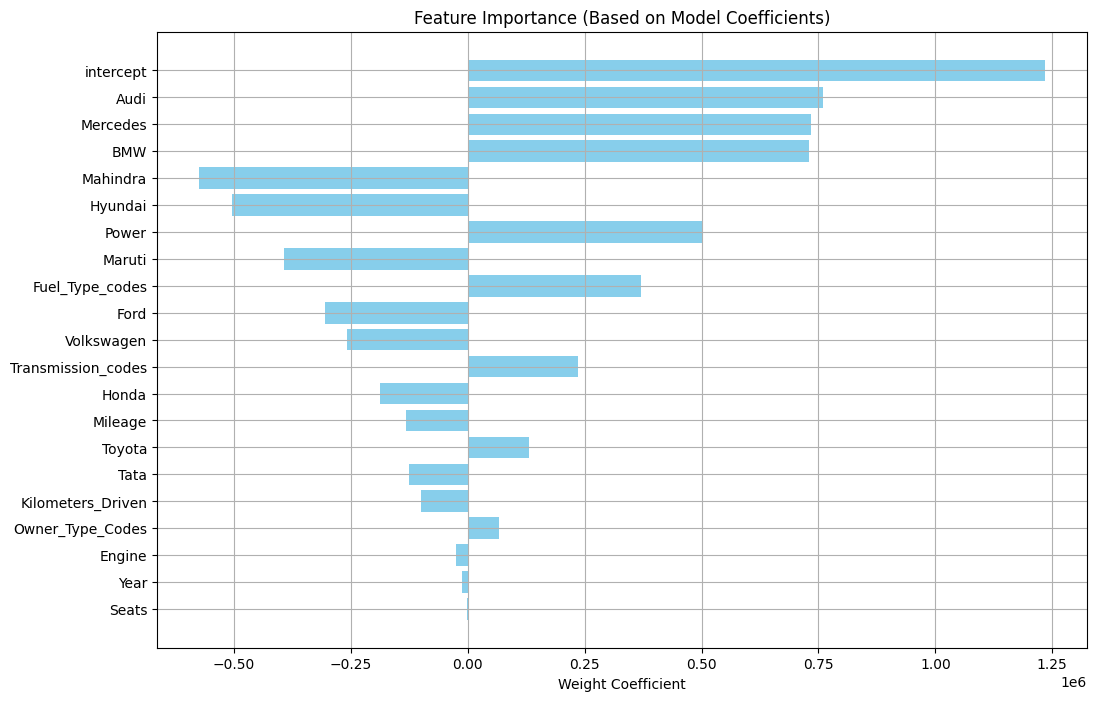

In [32]:
import matplotlib.pyplot as plt

# Додаємо абсолютні значення коефіцієнтів для сортування
weights_df['abs_weight'] = weights_df['weight'].abs()

# Сортуємо за абсолютним значенням коефіцієнтів
sorted_weights = weights_df.sort_values(by='abs_weight', ascending=False)

# Побудова горизонтального стовпчастого графіка
plt.figure(figsize=(12, 8))
plt.barh(sorted_weights['feature'], sorted_weights['weight'], color='skyblue')
plt.xlabel('Weight Coefficient')
plt.title('Feature Importance (Based on Model Coefficients)')
plt.gca().invert_yaxis()  # Перевертаємо порядок для зручності читання
plt.grid(True)
plt.show()

Бренди Mercedes, BMW, Audi мають значний позитивний вплив на ціну.

Важливий позитивний вплив мають також Power, Fuel_Type, менше Transmission.

Бренди Mahindra, Hyundai, Maruti мають негативний вплив, що логічно, оскільки бюджетні автомобілі коштують дешевше. Трохи менший негативний вплив має ознака Mileage та Kilometers_Driven.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [38]:
print(X_train.index)
print(y_train.index)

Index([83, 55, 26, 54, 19, 57, 46, 23, 36, 91, 81, 65, 84, 90, 88, 29, 38, 77,
       40, 78, 20, 10, 28, 96, 95, 71, 73, 72, 42, 79, 47, 66, 64, 61, 51, 53,
       11, 37, 44, 43,  1, 85, 69,  4, 56, 25, 94, 59, 98, 32, 82, 45, 97, 50,
       18, 63, 30, 33, 80, 62, 35, 87, 93,  0, 74, 99, 34, 13,  5, 52, 49, 22,
       48, 76, 67,  3,  2,  6, 27, 75],
      dtype='int64')
RangeIndex(start=0, stop=80, step=1)


In [35]:
import statsmodels.api as sm

# Скидання індексів у X_train_with_const і y_train
X_train_with_const = sm.add_constant(X_train_final).reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Побудова моделі
model = sm.OLS(y_train, X_train_with_const)
results = model.fit()
results.params

,0
const,1130862.42
Year,-11604.26
Kilometers_Driven,-99713.96
Mileage,-131884.63
Engine,-24683.08
Power,500000.51
Seats,-1744.05
Fuel_Type_codes,370607.51
Transmission_codes,236367.64
Audi,861608.72


In [36]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.14
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           2.34e-34
Time:                        12:48:23   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2228.
Df Residuals:                      60   BIC:                             2276.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.131e+06   8.78

In [41]:
significant_features = results.pvalues[results.pvalues < 0.05]
print(significant_features)

const                0.00
Mileage              0.03
Power                0.00
Fuel_Type_codes      0.00
Transmission_codes   0.01
Audi                 0.00
BMW                  0.00
Hyundai              0.00
Mahindra             0.00
Maruti               0.01
Mercedes             0.00
Toyota               0.03
dtype: float64


**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [44]:
significant_features = [
    'Mileage', 'Power', 'Fuel_Type_codes', 'Transmission_codes', 'Audi',
    'BMW', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Toyota'
]

X_train_significant = X_train_final[significant_features]

X_train_significant_with_const = sm.add_constant(X_train_significant)

model_significant = sm.OLS(y_train, X_train_significant_with_const)
results_significant = model_significant.fit()

summary_significant = results_significant.summary()

# Порівняння R-squared і Adj. R-squared
r2_original = results.rsquared
adj_r2_original = results.rsquared_adj

r2_significant = results_significant.rsquared
adj_r2_significant = results_significant.rsquared_adj

{
    "summary_significant": summary_significant,
    "original_r2": r2_original,
    "original_adj_r2": adj_r2_original,
    "significant_r2": r2_significant,
    "significant_adj_r2": adj_r2_significant
}


{'summary_significant': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Price   R-squared:                       0.954
 Model:                            OLS   Adj. R-squared:                  0.947
 Method:                 Least Squares   F-statistic:                     129.2
 Date:                Thu, 16 Jan 2025   Prob (F-statistic):           4.53e-41
 Time:                        13:04:43   Log-Likelihood:                -1098.0
 No. Observations:                  80   AIC:                             2220.
 Df Residuals:                      68   BIC:                             2248.
 Df Model:                          11                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------------

**Аналіз**

- Коефіцієнт детермінації R2 та скоригований R2:

Оригінальна модель: R2 - 0.959, скоригований R2 - 0.946

Модель з відібраними ознаками: R2 - 0.954, скоригований R2 - 0.947

Незначне зниження R2(з 0.959 до 0.954) свідчить, що видалення статистично незначущих ознак майже не вплинуло на здатність моделі пояснювати варіацію цільової змінної. При цьому скоригований R2
навіть трохи підвищився (з 0.946 до 0.947).

- Ключові показники моделі:

F-статистика: 129.2,

p-value = 4.53e-41 (дуже значуща), що свідчить про високу якість моделі.

AIC та BIC:

AIC = 2220, BIC = 2248 — показники складності моделі. Зниження цих значень після відбору ознак (оригінальна модель AIC = 2228, BIC = 2276) показує на покращення моделі.

- Оцінка моделі: високий  R2 та скоригований R2 свідчать про те, що модель добре пояснює цільову змінну.
Видалення незначущих ознак призвело до трохи меншої, але більш збалансованої моделі.


**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [53]:
pvalues_expanded = results.pvalues[results.pvalues < 0.25]
print(significant_features_expanded)

const                0.00
Kilometers_Driven    0.08
Mileage              0.03
Power                0.00
Fuel_Type_codes      0.00
Transmission_codes   0.01
Audi                 0.00
BMW                  0.00
Ford                 0.07
Hyundai              0.00
Mahindra             0.00
Maruti               0.01
Mercedes             0.00
Toyota               0.03
Volkswagen           0.15
dtype: float64


In [55]:
significant_features_expanded = [feature for feature, p_value in pvalues_expanded.items() if feature != "const"]

significant_features_expanded

['Kilometers_Driven',
 'Mileage',
 'Power',
 'Fuel_Type_codes',
 'Transmission_codes',
 'Audi',
 'BMW',
 'Ford',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Mercedes',
 'Toyota',
 'Volkswagen']

In [56]:
X_train_expanded = X_train_final[significant_features_expanded]

X_train_expanded_with_const = sm.add_constant(X_train_expanded)

model_expanded = sm.OLS(y_train, X_train_expanded_with_const)
results_expanded = model_expanded.fit()

summary_expanded = results_expanded.summary()

# Порівняння R-squared і Adj. R-squared
r2_original = results.rsquared
adj_r2_original = results.rsquared_adj

r2_significant = results_significant.rsquared
adj_r2_significant = results_significant.rsquared_adj

r2_expanded = results_expanded.rsquared
adj_r2_expanded = results_expanded.rsquared_adj

{
    "summary_expanded": summary_expanded,
    "original_r2": r2_original,
    "original_adj_r2": adj_r2_original,
    "significant_r2": r2_significant,
    "significant_adj_r2": adj_r2_significant,
    "expanded_r2": r2_expanded,
    "expanded_adj_r2": adj_r2_expanded
}

{'summary_expanded': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  Price   R-squared:                       0.958
 Model:                            OLS   Adj. R-squared:                  0.949
 Method:                 Least Squares   F-statistic:                     105.5
 Date:                Thu, 16 Jan 2025   Prob (F-statistic):           4.79e-39
 Time:                        13:45:33   Log-Likelihood:                -1094.8
 No. Observations:                  80   AIC:                             2220.
 Df Residuals:                      65   BIC:                             2255.
 Df Model:                          14                                         
 Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
 -----------------------------------------

**Результати останньої моделі (з розширеним набором ознак)**

Коефіцієнт детермінації у `model_expanded` R2 - 0.958, скоригований R2 - 0.949, що є кращим результатом ніж у `model_significant`: R2 - 0.954, скоригований R2 - 0.947, та скоригований R2 вищий ніж у  оригінальної `model` (скоригований R2 - 0.946).

AIC = 2220 і BIC = 2255: показують покращення моделі у порівнянні з оригінальною.

F-статистика: 105.5 з дуже низьким p-value (4.79e-39), що вказує на значущість моделі.

**Рекомендація щодо використання:**

модель `model_expanded`:

- вона має високе R2 і скориговане R2.

- ключає більше потенційно значущих змінних.

- не сильно поступається оригінальній моделі.
